**Installing Required Libraries**

In [1]:
!pip install duckdb pandas matplotlib seaborn

**Importing Libraries**

In [2]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


**Loading Dataset**

In [5]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


**Basic Data Validation**

In [6]:
# Check dataset shape
df.shape

(6607, 20)

In [7]:
# Check missing values
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [8]:
# Check data types
df.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


**Creating SQL Engine (DuckDB)**

In [9]:
con = duckdb.connect()
con.register("students", df)

***Average Exam Score vs Hours Studied (SQL)***

In [10]:
query = """
SELECT
    Hours_Studied,
    ROUND(AVG(Exam_Score), 2) AS avg_exam_score
FROM students
GROUP BY Hours_Studied
ORDER BY Hours_Studied;
"""
con.execute(query).df()

,Hours_Studied,avg_exam_score
0,1,71.00
1,2,63.00
2,3,61.33
3,4,61.65
4,5,62.86
5,6,63.47
6,7,64.35
7,8,64.16
8,9,64.16
9,10,64.39


***Effect of Sleep Hours on Exam Score***

In [11]:
query = """
SELECT
    Sleep_Hours,
    ROUND(AVG(Exam_Score), 2) AS avg_exam_score
FROM students
GROUP BY Sleep_Hours
ORDER BY Sleep_Hours;
"""
sleep_df = con.execute(query).df()
sleep_df

,Sleep_Hours,avg_exam_score
0,4,67.63
1,5,67.30
2,6,67.19
3,7,67.24
4,8,67.22
5,9,67.15
6,10,67.14


***Sleep vs Performance Visualization***

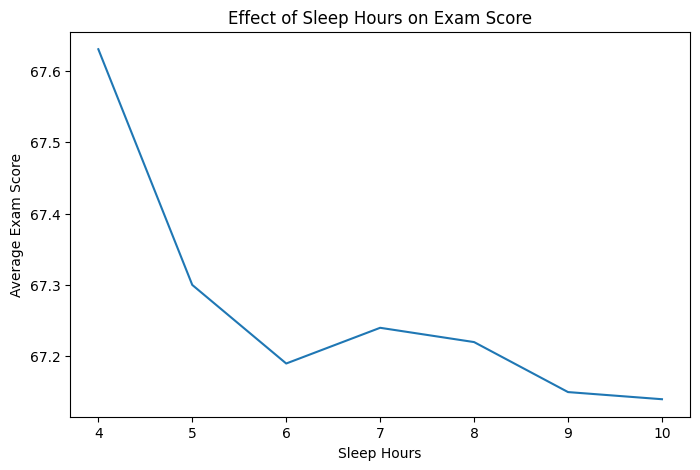

In [13]:
plt.figure(figsize=(8,5))
sns.lineplot(data=sleep_df, x="Sleep_Hours", y="avg_exam_score")
plt.title("Effect of Sleep Hours on Exam Score")
plt.xlabel("Sleep Hours")
plt.ylabel("Average Exam Score")
plt.show()

***Parental Involvement Impact***

In [14]:
query = """
SELECT
    Parental_Involvement,
    ROUND(AVG(Exam_Score), 2) AS avg_exam_score
FROM students
GROUP BY Parental_Involvement;
"""
con.execute(query).df()


,Parental_Involvement,avg_exam_score
0,High,68.09
1,Low,66.36
2,Medium,67.10


***Attendance vs Exam Score***

In [15]:
query = """
SELECT
    Attendance,
    ROUND(AVG(Exam_Score), 2) AS avg_exam_score
FROM students
GROUP BY Attendance
ORDER BY Attendance;
"""
con.execute(query).df()

,Attendance,avg_exam_score
0,60,62.41
1,61,63.38
2,62,63.76
3,63,64.36
4,64,63.88
5,65,63.91
6,66,64.54
7,67,64.63
8,68,65.15
9,69,65.12


***Extracurricular Activities Impact***

In [16]:
query = """
SELECT
    Extracurricular_Activities,
    ROUND(AVG(Exam_Score), 2) AS avg_exam_score
FROM students
GROUP BY Extracurricular_Activities;
"""
con.execute(query).df()

,Extracurricular_Activities,avg_exam_score
0,No,66.93
1,Yes,67.44


***Motivation Level Analysis***

In [17]:
query = """
SELECT
    Motivation_Level,
    ROUND(AVG(Exam_Score), 2) AS avg_exam_score
FROM students
GROUP BY Motivation_Level;
"""
con.execute(query).df()

,Motivation_Level,avg_exam_score
0,High,67.70
1,Low,66.75
2,Medium,67.33


***Internet Access Impact***

In [18]:
query = """
SELECT
    Internet_Access,
    ROUND(AVG(Exam_Score), 2) AS avg_exam_score
FROM students
GROUP BY Internet_Access;
"""
con.execute(query).df()

,Internet_Access,avg_exam_score
0,No,66.54
1,Yes,67.29


***High Performers Summary (Score ≥ 80)***

In [19]:
query = """
SELECT
    COUNT(*) AS high_performers,
    ROUND(AVG(Hours_Studied), 2) AS avg_hours_studied,
    ROUND(AVG(Sleep_Hours), 2) AS avg_sleep_hours,
    ROUND(AVG(Attendance), 2) AS avg_attendance
FROM students
WHERE Exam_Score >= 80;
"""
con.execute(query).df()

,high_performers,avg_hours_studied,avg_sleep_hours,avg_attendance
0,48,19.5,6.88,79.04


***Learning Disabilities vs Exam Score***

In [20]:
query = """
SELECT
    Learning_Disabilities,
    ROUND(AVG(Exam_Score), 2) AS avg_exam_score
FROM students
GROUP BY Learning_Disabilities;
"""
con.execute(query).df()


,Learning_Disabilities,avg_exam_score
0,Yes,66.27
1,No,67.35


***Gender-wise Performance***

In [21]:
query = """
SELECT
    Gender,
    ROUND(AVG(Exam_Score), 2) AS avg_exam_score
FROM students
GROUP BY Gender;
"""
con.execute(query).df()

,Gender,avg_exam_score
0,Male,67.23
1,Female,67.24
